In [1]:
### in this task missing values *should be imputed* with the mean value of the column
### impute missing values only in columns required for solutions

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (8, 4)})

#%matplotlib inline
#import matplotlib_inline
#matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv("amazon_books_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        946 non-null    object 
 1   author       824 non-null    object 
 2   price        944 non-null    float64
 3   pages        934 non-null    float64
 4   avg_reviews  823 non-null    float64
 5   n_reviews    946 non-null    int64  
 6   dimensions   914 non-null    object 
 7   weight       943 non-null    object 
 8   language     943 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 66.6+ KB


#### Question 1

In [4]:
### decide what data type each column is: numerical-discrete, numerical-continuous, categorical-nominal, categorical-ordinal
### consider only [price, pages, avg_reviews, n_reviews, language] for this analysis
### no need to add explanations, just the final answer

"""
price: numerical-continuous
pages: numerical-discrete
avg_reviews: numerical-continuous
n_reviews: numerical-discrete
language: categorical-nominal
"""

'\nprice: numerical-continuous\npages: numerical-discrete\navg_reviews: numerical-continuous\nn_reviews: numerical-discrete\nlanguage: categorical-nominal\n'

#### Question 2

positive skewness with value of 1.1281671549688748


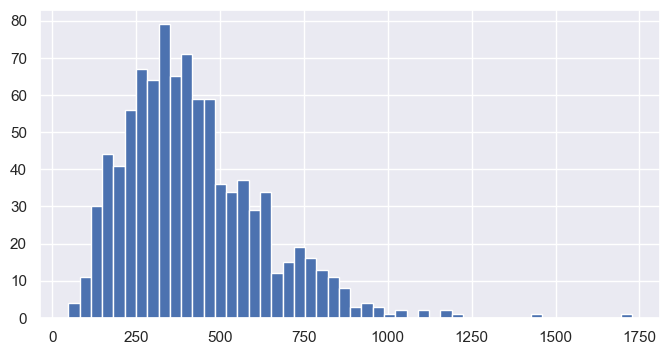

In [5]:
### plot a histogram of books' number of pages using 50 bins
### decide if the distribution is symmetric, skewed positive or skewed negative
### use both the histogram and required computations for this decision

plt.hist(df['pages'], bins=50)
skewness = df['pages'].skew()
print(f"positive skewness with value of {skewness}")

#### Question 3

positive skewness with value of 0    1.637934
dtype: float64


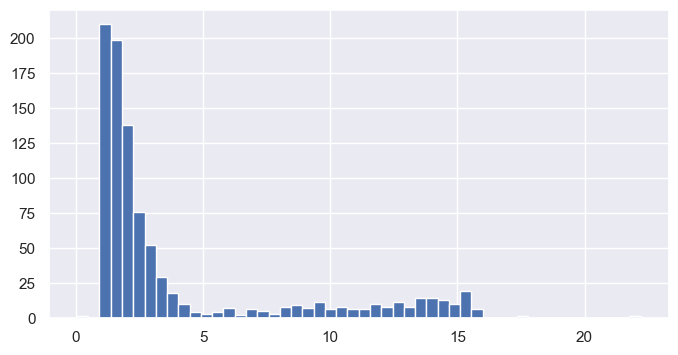

In [6]:
### inspect the 'weight' column carefully
### plot a histogram of books' weight using 50 bins
### decide if the distribution is symmetric, skewed positive or skewed negative
### use both the histogram and required computations for this decision

weights = df['weight'].str.extract(r'([0-9.]+)').astype(float)
plt.hist(weights, bins=50)
skewness = weights.skew()
print(f"positive skewness with value of {skewness}")

#### Question 4

In [7]:
### compute Pearson's correlation between a book's volume (inferred by its dimensions) and price in the data
### (you can use the built-in Series.corr() function for that purpose)

df[["x", "y", "z"]] = df["dimensions"].str.extract(r'([0-9.]+).*?([0-9.]+).*?([0-9.]+)').astype(float)
df["x"].fillna(df["x"].mean(), inplace=True)
df["y"].fillna(df["y"].mean(), inplace=True)
df["z"].fillna(df["z"].mean(), inplace=True)
df["price"].fillna(df["price"].mean(), inplace=True)
df["volume"] = df[["x", "y", "z"]].prod(axis=1)
df["volume"].corr(df["price"])


0.42194812158572326

#### Question 5

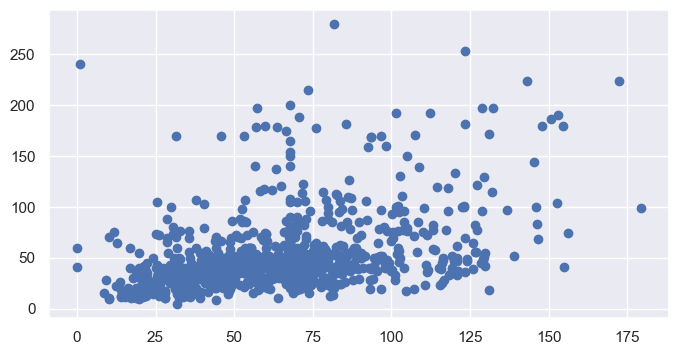

In [8]:
### show a scatter plot of a book's volume (inferred by its dimensions) and price
### do the results fit the score you got in the previous cell? (no need to print answer to this question)


plt.scatter(df["volume"], df["price"])

#### Question 6

In [9]:
### inspect book titles carefully: they can be roughly split by keyphrases:
### ['data science', 'data analytics', 'data engineering', 'machine learning', 'statistics', 
### 'deep learning', 'natural language processing']

### a book belongs to one of the above categories if its name contains the corresponding keyphrase
### display the number of books that fall into each category and their total, in the same table
### some books may not belong to any of the listed above categories
### category match should be case insensitive

keyphrases = ['data science', 'data analytics', 'data engineering', 'machine learning', 'statistics', 'deep learning', 'natural language processing']
keyphrase_df = pd.DataFrame()

df["title"] = df["title"].str.lower()
for keyphrase in keyphrases:
    keyphrase_df[keyphrase] = df["title"].str.contains(keyphrase, case=False, na=False)
keyphrase_count = keyphrase_df.sum()
keyphrase_count_df = pd.DataFrame(keyphrase_count).reset_index()
keyphrase_count_df.columns = ['keyphrase', 'book count']
keyphrase_count_df.loc[len(keyphrase_count_df)] = ['total', keyphrase_count_df["book count"].sum()]
keyphrase_count_df


,keyphrase,book count
0,data science,111
1,data analytics,28
2,data engineering,7
3,machine learning,179
4,statistics,128
5,deep learning,138
6,natural language processing,13
7,total,604


#### Question 7

In [10]:
### display the same result where the dataframe is sorted by the number of books, descending
### no need to display the total amount in this result - drop it


keyphrase_count_df = keyphrase_count_df.drop(index=len(keyphrase_count_df)-1)
keyphrase_count_df = keyphrase_count_df.sort_values("book count", ascending=False).reset_index(drop=True)
keyphrase_count_df

,keyphrase,book count
0,machine learning,179
1,deep learning,138
2,statistics,128
3,data science,111
4,data analytics,28
5,natural language processing,13
6,data engineering,7


#### Question 8

In [11]:
### sample 10000 values from N~(50, 10)
### for this pirpose use https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

### what portion of the distribution is found in the range (42.5, 57.5)? -- calculate using z table
### (recall the NormalDist().cdf() function we used at the lecture)

### what portion of the distribution is found in the range (42.5, 57.5)? -- compute empirically using the sampled values
### report both values (calculated and empirical)
import numpy as np
from statistics import NormalDist

mean = 50
std = 10
lower = 42.5
upper = 57.5
s = np.random.normal(mean, std, 10000)

z_lower = (lower-mean)/std
z_upper = (upper-mean)/std
calculated_portion = NormalDist().cdf(z_upper) - NormalDist().cdf(z_lower)

empirical_portion = ((s >= lower) & (s <= upper)).mean()

print(f"Calculated portion: {calculated_portion}")
print(f"Empirical portion: {empirical_portion}")



Calculated portion: 0.5467452952462635
Empirical portion: 0.5403


#### Question 9

In [12]:
### compute confidence interval of 90% for the true population mean of a book price on Amazon
### report left and right boundaries


def confidence_interval(data, alpha):
    mean, std, n = data.mean(), data.std(), len(data)
    z = NormalDist().inv_cdf(1-alpha/2.0)
    left, right = mean-z*std/(n**0.5), mean+z*std/(n**0.5)
    return left, right

price = df["price"]
left, right = confidence_interval(price, 0.1)
print(f"confidence interval of 90% for book price is: [{round(left, 2)}, {round(right, 2)}] dollars")

confidence interval of 90% for book price is: [50.15, 54.06] dollars


#### Question 10

In [13]:
### can one say with 85% confidence that the true population mean of a book price resides within the [49.0, 54.0] interval?
### show your computations, and print your answer: yes or no

In [14]:
left, right = confidence_interval(price, 0.15)
if 49<left and right<54:
    print("yes")
else:
    print("no")

yes
